# Exploratory analysis

1. This workbook covers some basic exploratory analyses to understand the data better
2. Both Review data and Product (meta data) have been analyzed here
3. Image data has not been analyzed

In [1]:
import pandas as pd
import gzip

# Reading the review
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [2]:
# # Reading the image features
# import struct

# def readImageFeatures(path):
#     f = open(path, 'rb')
#     while True:
#         asin = f.read(10)
#         if asin == '': break
#         feature = []
#         for i in range(4096):
#             feature.append(struct.unpack('f', f.read(4)))
#         yield asin, feature

In [3]:
%cd /Users/Deepthi/Documents/DSE/Capstone/Data/From Julius

/Users/Deepthi/Documents/DSE/Capstone/Data/From Julius


In [4]:
!ls

cell5.hd5
cleaned.hd5
cleaned.hd5.zip
image_features_Clothing_Shoes_and_Jewelry.b
meta_Clothing_Shoes_and_Jewelry.json.gz
ratings_Clothing_Shoes_and_Jewelry.csv
review_Women.csv
review_Women.csv.gz
review_women_brand_updated.csv
review_women_brnd_fv_prce_updated.csv
review_women_brnd_fv_updated.csv
review_women_brnd_fv_updated_2.csv
review_women_brnd_fv_updated_3.csv
reviews_Cell_Phones_and_Accessories_5_scraped.csv
reviews_Cell_Phones_and_Accessories_5_scraped.csv.gz
reviews_Clothing_Shoes_and_Jewelry.json.gz
reviews_Clothing_Shoes_and_Jewelry_5.json.gz
reviews_Women_ALL_scraped.csv
reviews_Women_ALL_scraped.csv.gz
reviews_Women_scraped.csv.gz
reviews_Women_scraped_cpp.csv
reviews_Women_scraped_cpp.csv.gz
reviews_Women_scraped_cpp_fv_2.csv
reviews_Women_scraped_cpp_fv_2.csv.zip
reviews_Women_scraped_cpp_fv_all.csv
reviews_Women_scraped_cpp_fv_all.csv.zip
reviews_cellphone_scraped_cpp_fv_2.csv
reviews_cellphone_scraped_cpp_fv_2.csv.zip
tfidf_score.csv


In [6]:
df_meta = pd.read_hdf('cleaned.hd5', key='womens')

In [8]:
# df_review = getDF('reviews_Women_scraped_cpp_fv_2.json.gz')
df_review = pd.read_csv('reviews_Women_scraped_cpp_fv_2.csv')

In [9]:
# df_image = readImageFeatures('image_features_Clothing_Shoes_and_Jewelry.b')

In [10]:
# df_image.next()

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

### Analyze customers

/Users/Deepthi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


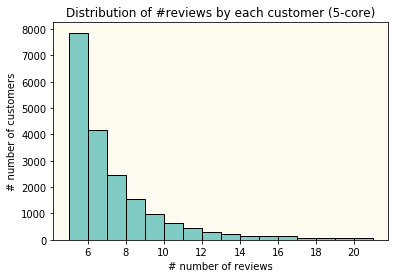

In [18]:
## Number of reviews by each customer
## This histogram shows that most customers write 5 reviews

# df_review.groupby(['reviewerID']).asin.nunique().reset_index()['asin'].hist(bins=range(5,25,1))

ax = df_review.groupby(['reviewerID']).asin.nunique().reset_index()['asin'].plot(kind = 'hist',bins =range(5,22,1),\
                                                                                 title = 'Distribution of #reviews by each customer (5-core)'\
                                                                                ,facecolor='#80cbc4',edgecolor='black')
ax.set_xlabel('# number of reviews')
ax.set_ylabel('# number of customers')
ax.set_axis_bgcolor('#fffbf0')
plt.show()

In [11]:
## To plot the same distribution as %
df = df_review.groupby(['reviewerID']).asin.nunique().reset_index()
# df2= df.groupby(['asin']).count('asin').reset_index().sort('reviewerID',ascending = False)

df2= df.groupby(['asin']).reviewerID.nunique().reset_index().sort('reviewerID',ascending = False)

In [12]:
def flag(row):
        if row['asin'] == 5 :
            return '05'
        if row['asin'] == 6 :
            return '06'
        if row['asin'] == 7 :
            return '07'
        if row['asin'] == 8 :
            return '08'
        if row['asin'] == 9 :
            return '09'
        if row['asin'] == 10 :
            return '10'
        if row['asin'] > 10 :
            return '>10'

In [13]:
df2['flag']=df2.apply(lambda row: flag(row),axis=1)
df3 = df2.groupby(['flag']).reviewerID.sum().reset_index()

In [14]:
df3['pct'] = df3['reviewerID']/(df3['reviewerID'].sum())*100

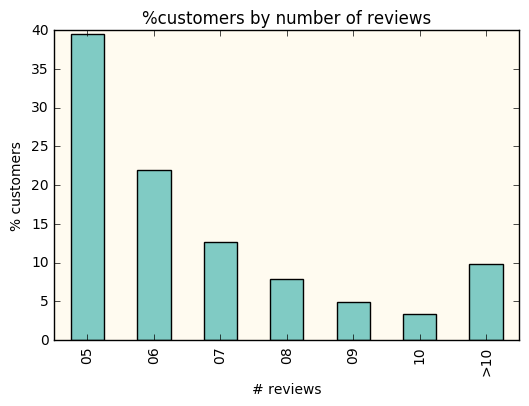

In [15]:
ax = df3.sort('flag',ascending=True).plot(kind='bar',x = 'flag',y='pct', color ='#80cbc4',\
                                     title='%customers by number of reviews'\
                                     ,legend = False)
ax.set_xlabel('# reviews')
ax.set_ylabel('% customers')
ax.set_axis_bgcolor('#fffbf0')
plt.show()

## This graph says that 40% of the customers write 5 reviews 
## 75% of the reviews are written by customers writing upto 7 reviews

### Helpful ratings

In [16]:
helpful = df_review['helpful']

In [17]:
yes=[]
no=[]
for i in range(len(df_review['helpful'])):
    x = df_review['helpful'][i][0]
    yes.append(x)
    y = df_review['helpful'][i][1]
    no.append(y)

In [18]:
df_review['helpful_yes']=yes
df_review['helpful_no']=no

In [19]:
helpful_review = df_review[['overall','helpful_yes','helpful_no']].groupby('overall').sum().reset_index()

In [20]:
helpful_review['yes_pct'] = helpful_review['helpful_yes']*100/(helpful_review['helpful_yes']+ helpful_review['helpful_no'])
helpful_review['no_pct'] = helpful_review['helpful_no']*100/(helpful_review['helpful_yes']+ helpful_review['helpful_no'])

In [21]:
helpful_review
## Higher tendency to click 'no' when not helpful than clicking 'yes' when helpful

,overall,helpful_yes,helpful_no,yes_pct,no_pct
0,1,20288,29251,40.953592,59.046408
1,2,19916,25947,43.424983,56.575017
2,3,34551,42719,44.714637,55.285363
3,4,60848,70105,46.465526,53.534474
4,5,183743,206687,47.061701,52.938299


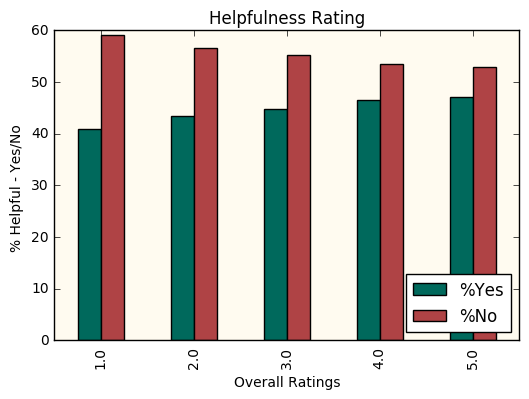

In [22]:
ax = helpful_review[['overall','yes_pct','no_pct']].plot(kind = 'bar', x = 'overall', title = 'Helpfulness Rating'\
                                                        ,color =['#00695c','#af4345'])
                                                        


ax.set_xlabel('Overall Ratings')
ax.set_ylabel('% Helpful - Yes/No ')
ax.set_axis_bgcolor('#fffbf0')
ax.legend(('%Yes','%No'),loc=4)

### Overall Ratings

In [23]:
overall_ratings = df_review[['reviewerID','asin','overall']].drop_duplicates().groupby(['overall']).reviewerID\
                  .nunique().reset_index()

In [24]:
total_cust_ratings = overall_ratings['reviewerID'].sum()

In [25]:
overall_ratings['num_cust_ratings_pct'] = overall_ratings['reviewerID']*100/total_cust_ratings

In [26]:
overall_ratings
## People tend to write a review only if they like the product
## I expected them to write a review if they hate it as well

,overall,reviewerID,num_cust_ratings_pct
0,1,8025,7.790808
1,2,11214,10.886744
2,3,19056,18.499893
3,4,26930,26.144108
4,5,37781,36.678446


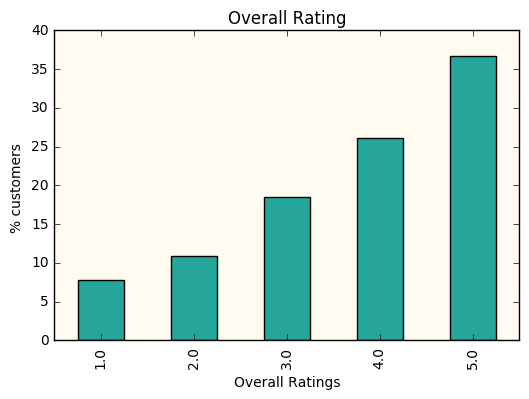

In [27]:
ax = overall_ratings.plot(kind = 'bar', x = 'overall',y='num_cust_ratings_pct', title = 'Overall Rating'\
                                                        ,color =['#26a69a'], legend = False)
                                                        


ax.set_xlabel('Overall Ratings')
ax.set_ylabel('% customers ')
ax.set_axis_bgcolor('#fffbf0')

### Reviews by time

In [28]:
df_review.groupby(['reviewTime','overall']).reviewerID.count().reset_index().to_csv('time_plot.csv')

In [29]:
reviews_by_time = df_review.groupby(['reviewTime']).reviewerID.count().reset_index()

In [30]:
reviews_by_time['year'] = reviews_by_time.reviewTime.apply(lambda x: x[6:]).str.strip()
reviews_by_time['month'] = reviews_by_time.reviewTime.apply(lambda x: x[0:2]).str.strip()

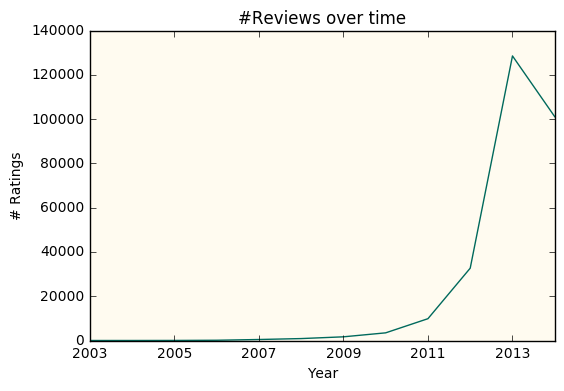

In [31]:
ax = reviews_by_time.groupby('year').reviewerID.sum().reset_index().plot(x='year',y='reviewerID', color='#00695c',\
                                                                         legend = False, title = '#Reviews over time')

ax.set_xlabel('Year')
ax.set_ylabel('# Ratings')
ax.set_axis_bgcolor('#fffbf0')

## Huge increase in reviews since 2011

In [32]:
reviews_by_time1= reviews_by_time[reviews_by_time['year']>'2011']

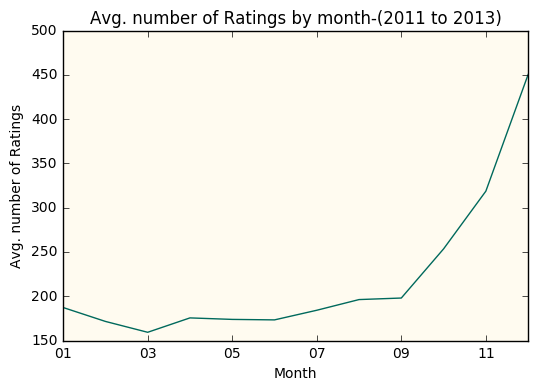

In [33]:
ax = reviews_by_time1[(reviews_by_time1['year']<>'2014')].groupby(['month']).reviewerID.mean().reset_index().\
plot(x='month',y='reviewerID', legend = False, title = 'Avg. number of Ratings by month-(2011 to 2013)',color='#00695c')


ax.set_xlabel('Month')
ax.set_ylabel('Avg. number of Ratings')
ax.set_axis_bgcolor('#fffbf0')
## Highest number of reviews during holiday season

In [34]:
reviews_by_time.groupby(['year','month']).reviewerID.sum().reset_index()
# .to_csv('by_year.csv')
## Plotted this by year in excel - it seems like there is a trend in 2013 and 2014 where:
## 1. There is a small peak in Feb
## 2. Huge peak starting from september

,year,month,reviewerID
0,2003,03,1
1,2003,12,1
2,2004,07,1
3,2004,09,3
4,2004,12,2
5,2005,03,1
6,2005,04,2
7,2005,05,1
8,2005,06,1
9,2005,07,2


### Size of the reviews

In [35]:
df_review['reviewText_len']=df_review['reviewText'].str.len()

In [36]:
df_review['reviewText_len'].mean()

315.2434359491454

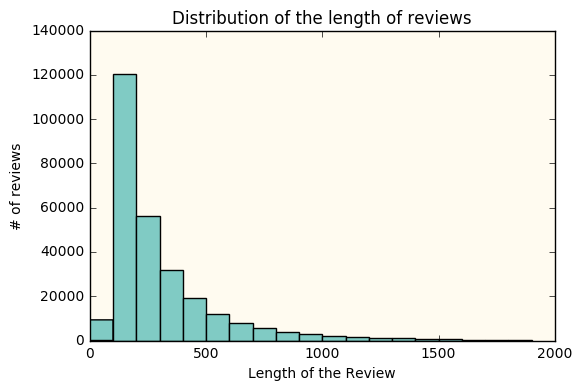

In [37]:
ax = df_review['reviewText_len'].plot(kind = 'hist',bins=range(0,2000,100),\
                         title = 'Distribution of the length of reviews'\
                        ,facecolor='#80cbc4')


ax.set_xlabel('Length of the Review')
ax.set_ylabel('# of reviews')
ax.set_axis_bgcolor('#fffbf0')

In [38]:
df_review.groupby(['reviewText_len','overall']).reviewerID.count().reset_index().to_csv('review_length.csv')

## Nothing important

In [39]:
df_review.groupby(['reviewText_len','helpful_yes']).reviewerID.count().reset_index().to_csv('review_length_yes.csv')

### Analyze products

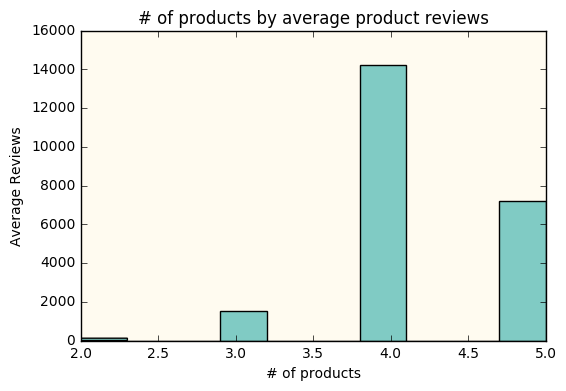

In [40]:
# df_review.groupby('asin').overall.mean().round().reset_index()['overall'].hist()
ax = df_review.groupby('asin').overall.mean().round().reset_index()['overall']\
                              .plot(kind = 'hist',\
                               title = '# of products by average product reviews'\
                               ,facecolor='#80cbc4')
    
    
ax.set_xlabel('# of products')
ax.set_ylabel('Average Reviews')
ax.set_axis_bgcolor('#fffbf0')
## Most products have an average rating of 4 - very skewed??

In [41]:
df_meta['asin'].nunique()

1503384

In [42]:
df_meta.count()

asin           1503384
categories     1503384
title          1502696
price           574882
salesRank      1422273
imUrl          1503305
brand            98132
related        1057123
description      85442
dtype: int64

In [43]:
df_meta['price2'] = df_meta['price'].round()



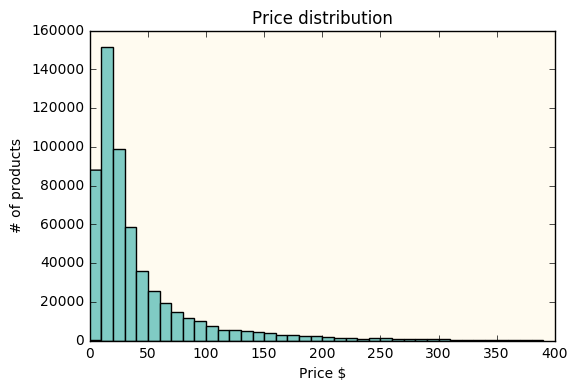

In [44]:
# df_meta.groupby('price2').asin.count().reset_index()['asin'].hist(bins=range(0,5000,1))

# df_meta['price2'].hist(bins=range(0,400,10))


ax = df_meta['price2']\
      .plot(kind = 'hist',bins=range(0,400,10),\
       title = 'Price distribution'\
       ,facecolor='#80cbc4')
    
    
ax.set_xlabel('Price $')
ax.set_ylabel('# of products')
ax.set_axis_bgcolor('#fffbf0')


plt.show()

In [45]:
## Filter out only for clothing data

In [46]:
df_meta['categories'][4]

[['Clothing, Shoes & Jewelry',
  'Women',
  'Accessories',
  'Sunglasses & Eyewear Accessories',
  'Sunglasses'],
 ['Clothing, Shoes & Jewelry',
  'Men',
  'Accessories',
  'Sunglasses & Eyewear Accessories',
  'Sunglasses'],
 ['Clothing, Shoes & Jewelry',
  'Novelty, Costumes & More',
  'Band & Music Fan',
  'Accessories']]

In [47]:
flat = []
for i in range(len(df_meta['categories'])):
    flattened = list(set([y for x in df_meta['categories'][i] for y in x]))
    flat.append(flattened)

In [48]:
df_meta['category']=flat

In [49]:
men = []
women = []
for i in range(len(df_meta['category'])):
    if 'Clothing, Shoes & Jewelry' in df_meta['category'][i]:
        if ('Men' in df_meta['category'][i]) and ('Women' in df_meta['category'][i]):
            m = 1
            w = 1
        elif ('Men' in df_meta['category'][i]) and ~('Women' in df_meta['category'][i]):
            m = 1
            w = 0
        elif ('Women' in df_meta['category'][i]) and ~('Men' in df_meta['category'][i]):
            w = 1
            m = 0
        else:
            w = 0
            m = 0
        men.append(m)
        women.append(w)
            
    

In [50]:
df_meta['men'] = men
df_meta['women'] = women


In [51]:
def category_flag(row):
        if (row['men'] == 1) and (row['women'] == 1) :
            return 'Unisex'
        if (row['men'] == 0) and (row['women'] == 1):
            return 'Women'
        if (row['men'] == 1) and (row['women'] == 0):
            return 'Men'
        if (row['men'] == 0) and (row['women'] == 0):
            return 'Others'
        
       

In [52]:
df_meta['category_flag']=df_meta.apply(lambda row: category_flag(row),axis=1)

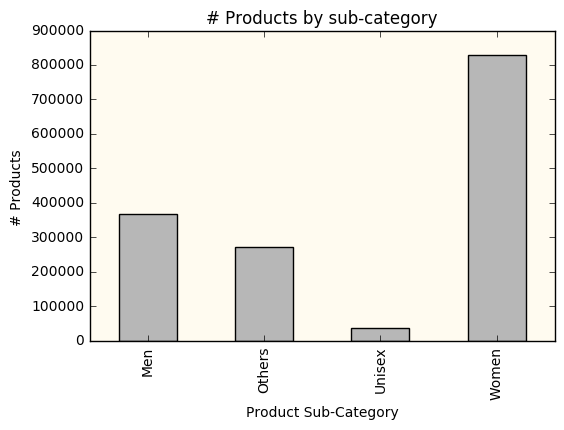

In [53]:
# df_meta.groupby('category_flag').asin.count().plot(kind = 'bar')
# plt.show()



ax = df_meta.groupby('category_flag').asin.count().\
            plot(kind = 'bar', title = '# Products by sub-category'\
            ,color =['#b7b7b7'], legend = False)
                                                        


ax.set_xlabel('Product Sub-Category')
ax.set_ylabel('# Products ')
ax.set_axis_bgcolor('#fffbf0')


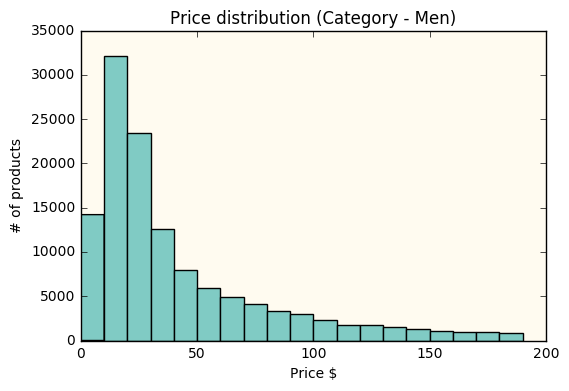

In [54]:
# df_meta[df_meta['category_flag']== 'Men'][['price2']].hist(bins = range(0,200,10))


ax = df_meta[df_meta['category_flag']== 'Men'][['price2']]\
      .plot(kind = 'hist',bins=range(0,200,10),\
       title = 'Price distribution (Category - Men)'\
       ,facecolor='#80cbc4', legend = False)
    
    
ax.set_xlabel('Price $')
ax.set_ylabel('# of products')
ax.set_axis_bgcolor('#fffbf0')


plt.show()

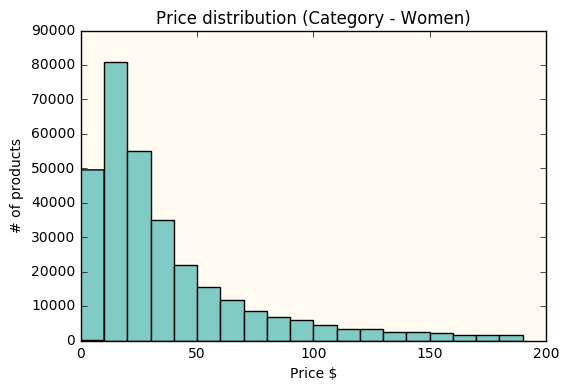

In [55]:
# df_meta[df_meta['category_flag']== 'Women'][['price2']].hist(bins = range(0,200,10))

ax = df_meta[df_meta['category_flag']== 'Women'][['price2']]\
      .plot(kind = 'hist',bins=range(0,200,10),\
       title = 'Price distribution (Category - Women)'\
       ,facecolor='#80cbc4', legend = False)
    
    
ax.set_xlabel('Price $')
ax.set_ylabel('# of products')
ax.set_axis_bgcolor('#fffbf0')


plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x232c62150>]], dtype=object)

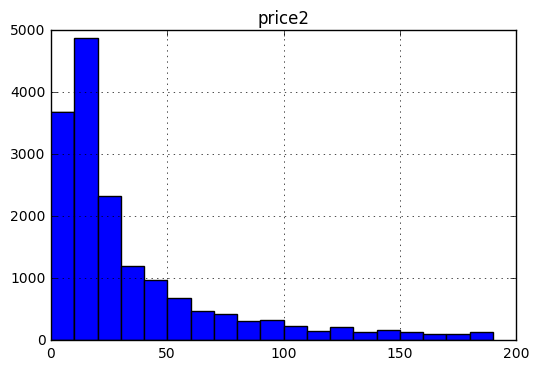

In [56]:
df_meta[df_meta['category_flag']== 'Unisex'][['price2']].hist(bins = range(0,200,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129645cd0>]], dtype=object)

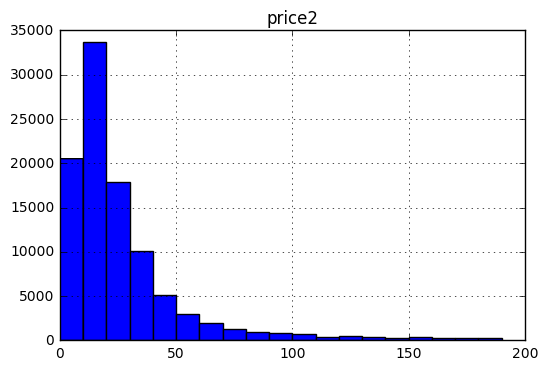

In [57]:
df_meta[df_meta['category_flag']== 'Others'][['price2']].hist(bins = range(0,200,10))